(2205, 39)


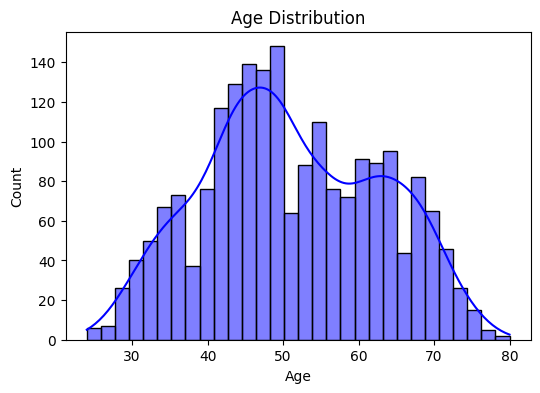

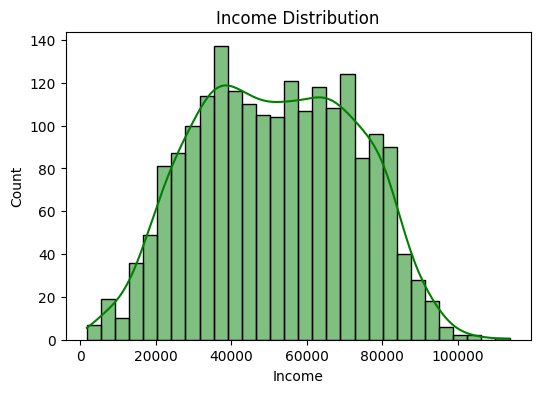

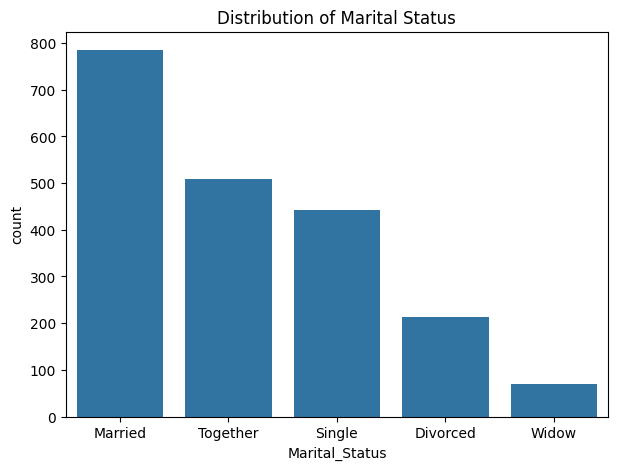

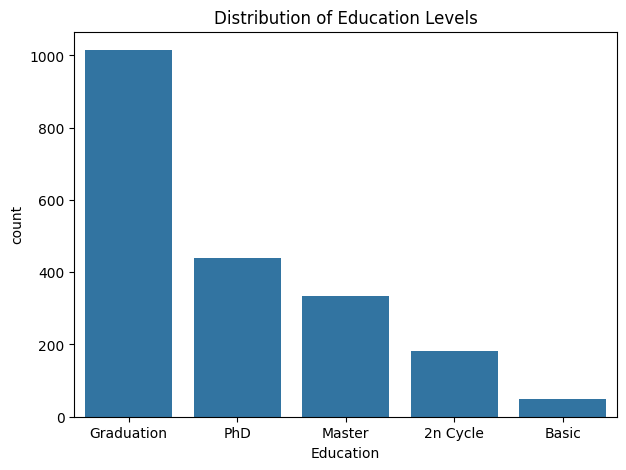

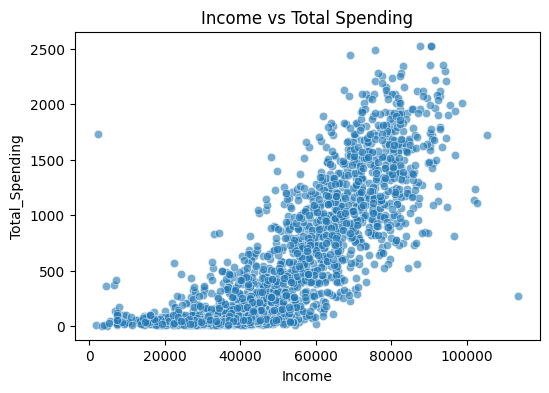

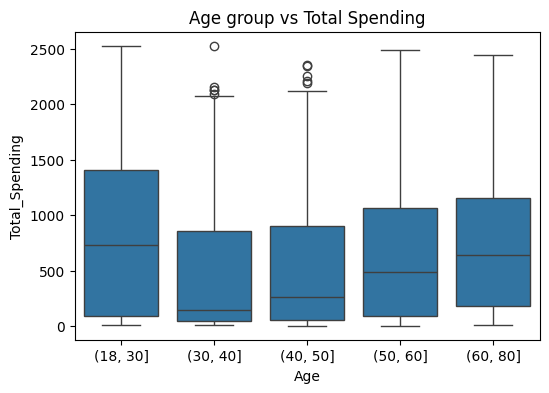

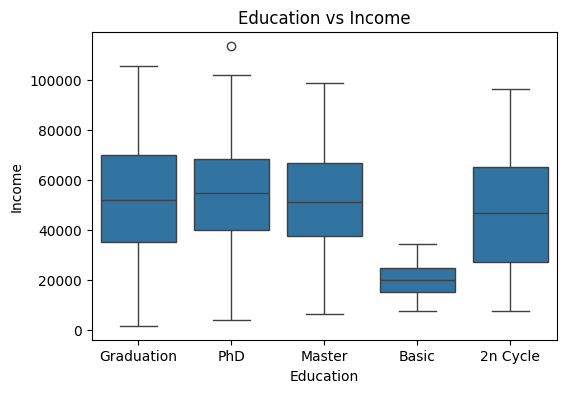

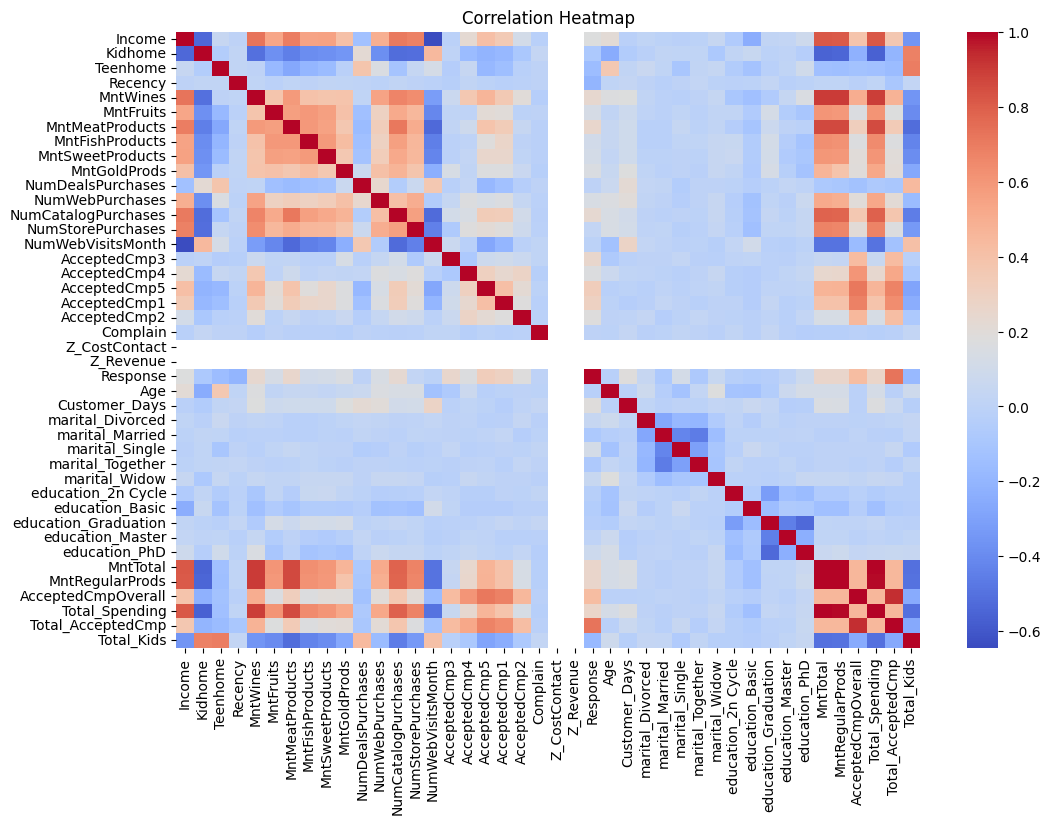

/tmp/ipython-input-816299852.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cmp_success.index, y=cmp_success.values, palette="magma")


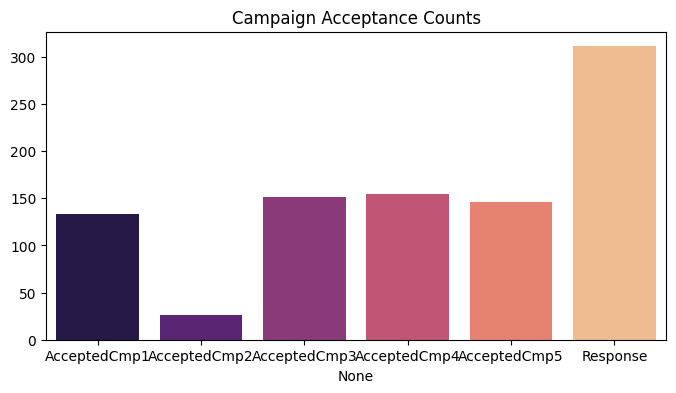

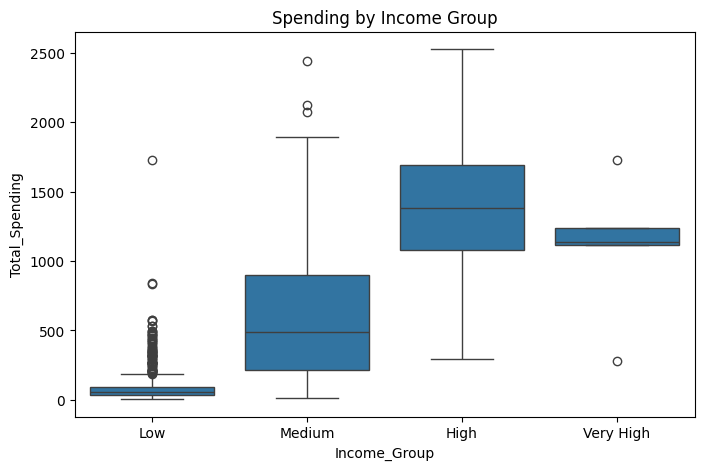

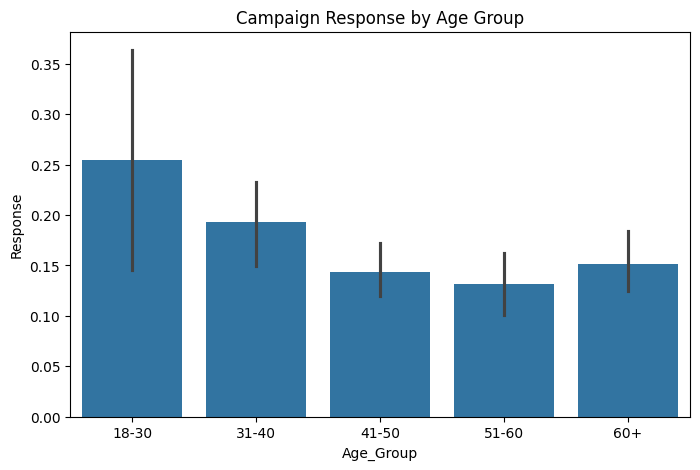

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Load data
df=pd.read_csv("ifood_df.csv")
df.head()
# df.info()
df.describe()
df.isnull().sum()
print(df.shape)

#cleaning data
df.drop_duplicates(inplace=True)

#feature Engineering
#total spending
spend_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['Total_Spending'] = df[spend_cols].sum(axis=1)
df['Total_Spending'].head()

#total campaign acceptances
cmp_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df['Total_AcceptedCmp'] = df[cmp_cols].sum(axis=1)
df['Total_AcceptedCmp'].head()

# dummy marital columns
marital_cols = ['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow']
df['Marital_Status'] = df[marital_cols].idxmax(axis=1).str.replace('marital_', '')

#dummy education column
edu_cols = ['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']
df['Education'] = df[edu_cols].idxmax(axis=1).str.replace('education_', '')

#total kids
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']

#handling missing value in income
df['Income'] = df['Income'].fillna(df['Income'].median())

df[['Age','Income','Total_Spending','Total_AcceptedCmp','Total_Kids']].head()


#univariate Analysis(VISUALIZATION)
#age distribution plot
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=30, color="blue")
plt.title("Age Distribution")
plt.show()

#income distribution plot
plt.figure(figsize=(6,4))
sns.histplot(df['Income'], kde=True, bins=30, color="green")
plt.title("Income Distribution")
plt.show()

#martial status pot
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Marital_Status', order=df['Marital_Status'].value_counts().index)
plt.title("Distribution of Marital Status")
plt.show()

#education plot
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index)
plt.title("Distribution of Education Levels")
plt.show()

#Bivariate Analysis
# Income vs Spending
plt.figure(figsize=(6,4))
sns.scatterplot(x='Income', y='Total_Spending', data=df, alpha=0.6)
plt.title("Income vs Total Spending")
plt.show()

# Age vs Spending
plt.figure(figsize=(6,4))
sns.boxplot(x=pd.cut(df['Age'], bins=[18,30,40,50,60,80]), y='Total_Spending', data=df)
plt.title("Age group vs Total Spending")
plt.show()

# Education vs Income
plt.figure(figsize=(6,4))
sns.boxplot(x='Education', y='Income', data=df)
plt.title("Education vs Income")
plt.show()

#Correlation Heatmap
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Campaign Effectiveness
cmp_success = df[cmp_cols].sum()
plt.figure(figsize=(8,4))
sns.barplot(x=cmp_success.index, y=cmp_success.values, palette="magma")
plt.title("Campaign Acceptance Counts")
plt.show()

# Customer Segmentation
df['Age_Group'] = pd.cut(df['Age'], bins=[18,30,40,50,60,100], labels=["18-30","31-40","41-50","51-60","60+"])
df['Income_Group'] = pd.cut(df['Income'], bins=[0,40000,70000,100000,200000], labels=["Low","Medium","High","Very High"])

plt.figure(figsize=(8,5))
sns.boxplot(x='Income_Group', y='Total_Spending', data=df)
plt.title("Spending by Income Group")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Age_Group', y='Response', data=df, estimator=np.mean)
plt.title("Campaign Response by Age Group")
plt.show()


